### Building a Predictive Model

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
from sklearn.model_selection import train_test_split

In [ ]:
knc = KNeighborsClassifier()

In [37]:
X_train, \
    X_test, \
    y_train, \
    y_test = train_test_split(features, target, random_state=10)

In [38]:
scores = []
for i in range(2,20):
    knc = KNeighborsClassifier(i)
    knc.fit(X_train, y_train)
    train_score = knc.score(X_train, y_train)
    test_score = knc.score(X_test, y_test)
    scores.append({
        'k' : i,
        'train_score' : train_score,
        'test_score' : test_score
    })
scores_df = pd.DataFrame(scores)
scores_df.set_index('k', inplace=True)
scores_df

,test_score,train_score
k,,
2,0.943396,0.961783
3,0.886792,0.961783
4,0.905660,0.936306
5,0.905660,0.917197
6,0.924528,0.917197
7,0.905660,0.910828
8,0.924528,0.910828
9,0.924528,0.917197
10,0.905660,0.917197


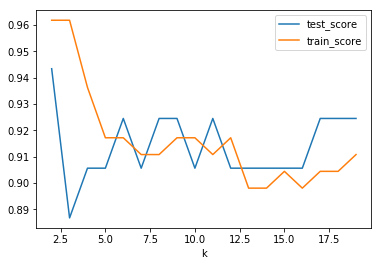

In [39]:
scores_df.plot()

In [40]:
scores = []
for i in range(1,10):
    knc = KNeighborsClassifier(i*2)
    knc.fit(X_train, y_train)
    train_score = knc.score(X_train, y_train)
    test_score = knc.score(X_test, y_test)
    scores.append({
        'k' : i*2,
        'train_score' : train_score,
        'test_score' : test_score
    })
scores_df = pd.DataFrame(scores)
scores_df.set_index('k', inplace=True)
scores_df

,test_score,train_score
k,,
2,0.943396,0.961783
4,0.905660,0.936306
6,0.924528,0.917197
8,0.924528,0.910828
10,0.905660,0.917197
12,0.905660,0.917197
14,0.905660,0.898089
16,0.905660,0.898089
18,0.924528,0.904459


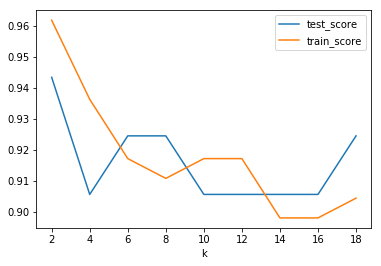

In [41]:
scores_df.plot()

In [42]:
best_features = list(lm_scores_df.index)

In [43]:
lr = LogisticRegression()
knc = KNeighborsClassifier(2)

X_train_df = pd.DataFrame(X_train)
X_train_df.columns = features.columns
X_test_df = pd.DataFrame(X_test)
X_test_df.columns = features.columns

final_performance_scores = []
for i in range(len(best_features)):
    knc = KNeighborsClassifier(2)
    feats = best_features[:i+1]
    lr.fit(X_train_df[feats], y_train)
    knc.fit(X_train_df[feats], y_train)    

    final_performance_scores.append({
        'features' : ' '.join(feats),
        'feature_added' : best_features[i],
        'lr_train_score' : lr.score(X_train_df[feats], y_train),
        'lr_test_score' : lr.score(X_test_df[feats], y_test),
        'knc_train_score' : knc.score(X_train_df[feats], y_train),
        'knc_test_score' : knc.score(X_test_df[feats], y_test)
    })

final_performance_scores_df = pd.DataFrame(final_performance_scores)
final_performance_scores_df.set_index('feature_added', inplace=True)
final_performance_scores_df

,features,knc_test_score,knc_train_score,lr_test_score,lr_train_score
feature_added,,,,,
area,area,0.886792,0.898089,0.660377,0.707006
width_of_kernel,area width_of_kernel,0.886792,0.923567,0.773585,0.783439
perimeter,area width_of_kernel perimeter,0.886792,0.904459,0.867925,0.859873
length_of_kernel,area width_of_kernel perimeter length_of_kernel,0.886792,0.917197,0.867925,0.853503
length_of_kernel_groove,area width_of_kernel perimeter length_of_kerne...,0.943396,0.942675,0.924528,0.917197
asymmetry_coefficient,area width_of_kernel perimeter length_of_kerne...,0.943396,0.961783,0.905660,0.923567
compactness,area width_of_kernel perimeter length_of_kerne...,0.943396,0.961783,0.905660,0.923567


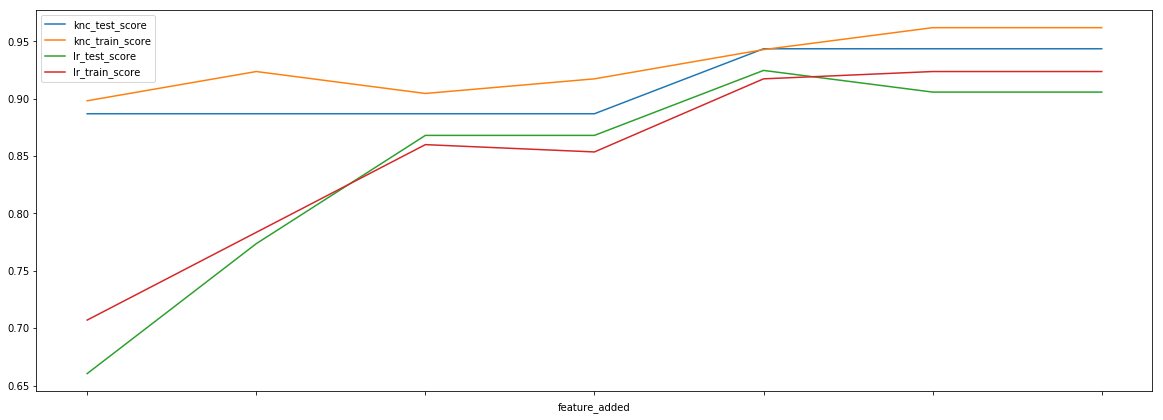

In [44]:
final_performance_scores_df.plot(rot=45, figsize=(20,7))